# Sentiment analysis

## 1.Data Exploration

In [1]:
import pandas as pd

# Try different encodings until the file is read successfully
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        data = pd.read_csv(r'D:\datasets\train.csv', encoding=encoding)
        break  # Break the loop if the file is read successfully
    except UnicodeDecodeError:
        continue  # Try the next encoding if decoding fails

# Display the first few rows of the DataFrame
data.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [2]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None


In [3]:
# Display the first few rows to understand the structure and features
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan       

In [4]:
# Identify key variables such as text content and sentiment labels
text_content = data['text']  # Assuming 'text' is the column containing text content
sentiment_labels = data['sentiment']  # Assuming 'sentiment' is the column containing sentiment labels

# Display key variables
print("\nText Content:")
print(text_content.head())

print("\nSentiment Labels:")
print(sentiment_labels.head())


Text Content:
0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Sentiment Labels:
0     neutral
1    negative
2    negative
3    negative
4    negative
Name: sentiment, dtype: object


## 2.Data preprocessing

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [6]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Text preprocessing function
def preprocess_text(text):
    # Check if the input is not a string, return an empty string or handle it accordingly
    if not isinstance(text, str):
        return ''
    
    # Lowercasing
    text = text.lower()
    
    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply text preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Display the preprocessed text
print(data[['text', 'preprocessed_text']].head())

                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                        preprocessed_text  
0                      id responded going  
1                 sooo sad miss san diego  
2                            bos bullying  
3                   interview leave alone  
4  son couldnt put release already bought  


In [8]:
# Display the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()
print("\nDistribution of Sentiment Labels:")
print(sentiment_counts)


Distribution of Sentiment Labels:
sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


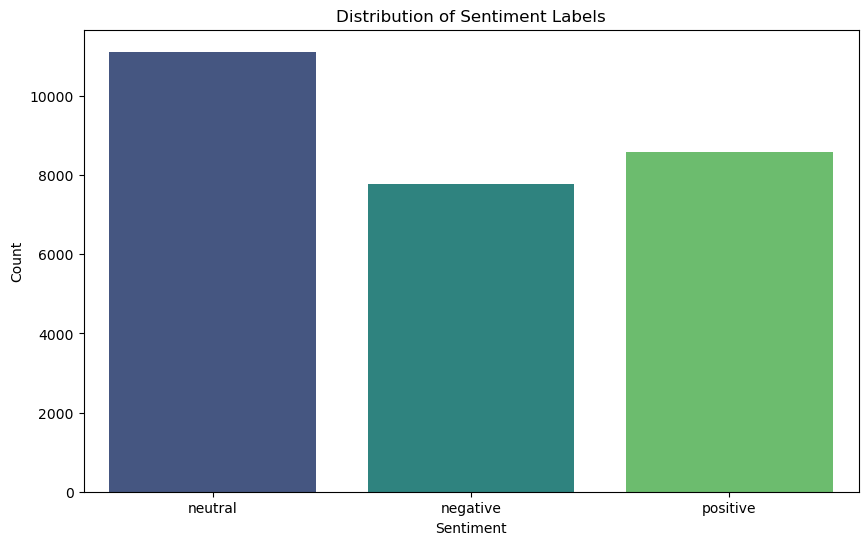

In [9]:
# Plot the distribution of sentiment labels using a count plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

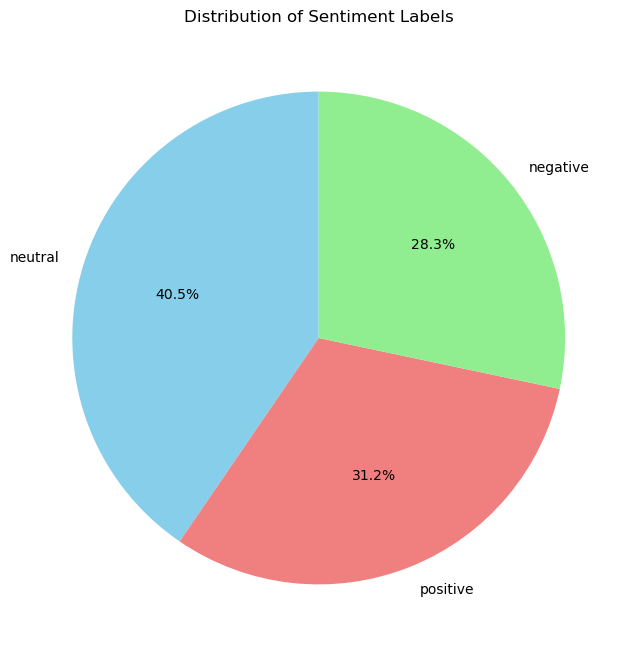

In [10]:
# Plot the distribution of sentiment labels using a pie chart
plt.figure(figsize=(8, 8))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Sentiment Labels')
plt.ylabel('')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


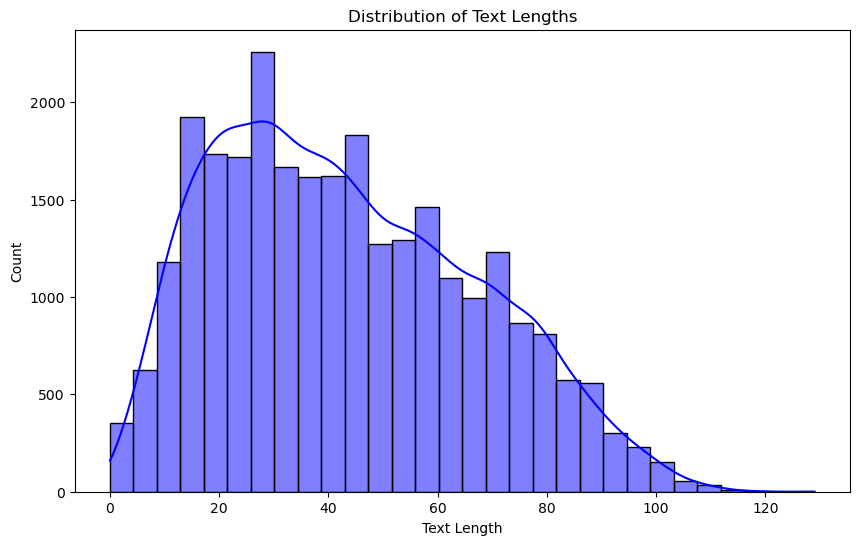

In [11]:
# Additional EDA - Text length analysis
data['text_length'] = data['preprocessed_text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

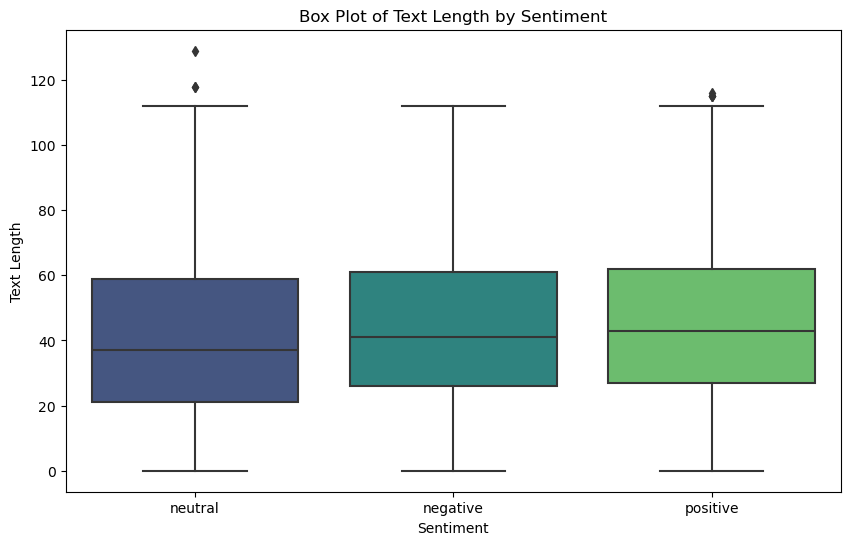

In [12]:
# Box plot of text length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=data, palette='viridis')
plt.title('Box Plot of Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

## 4. Text Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['preprocessed_text'])

# Convert to DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   aaaah  aah  aaron   ab  abandoned  abby  ability  abit  able  absolutely  \
0    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
1    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
2    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
3    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
4    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   

   ...  yup  zac  zach  zealand  zelda  zero  zoe  zombie  zone  zoo  
0  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
1  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
2  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
3  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
4  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  

[5 rows x 5000 columns]


## 5. Model Selection:

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel for text classification
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the first few predictions and their true labels (optional)
print("\nPredictions:", y_pred[:10])
print("True Labels:", y_test[:10].values)


Accuracy: 0.7016554484264144
Precision: 0.7116497254186686
Recall: 0.7016554484264144
F1 Score: 0.701149373127315

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1562
     neutral       0.64      0.77      0.70      2230
    positive       0.77      0.71      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497


Predictions: ['neutral' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'positive' 'neutral' 'neutral']
True Labels: ['positive' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'negative'
 'positive' 'negative' 'neutral']


In [15]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.68978849 0.69388219 0.70343416 0.6881965  0.69290264]
Mean CV Score: 0.6936407961172965


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Get feature names from TF-IDF vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get the coefficients (weights) of the model
coefficients = svm_model.coef_

# Get the top 10 features with the highest coefficients for each class
n_classes = len(svm_model.classes_)
for i in range(n_classes):
    class_name = svm_model.classes_[i]
    top_features_idx = np.argsort(coefficients[i])[-10:]
    top_features = feature_names[top_features_idx]
    print(f"Top 10 features for class '{class_name}':")
    print(top_features)


Top 10 features for class 'negative':
['aaaah']
Top 10 features for class 'neutral':
['aaaah']
Top 10 features for class 'positive':
['aaaah']


In [18]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 928  543   91]
 [ 248 1719  263]
 [  63  432 1210]]


In [19]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for each class
class_precisions = precision_score(y_test, y_pred, average=None)
class_recalls = recall_score(y_test, y_pred, average=None)

# Print precision and recall for each class
for i, class_name in enumerate(svm_model.classes_):
    print(f"Class '{class_name}': Precision = {class_precisions[i]}, Recall = {class_recalls[i]}")


Class 'negative': Precision = 0.7489911218724778, Recall = 0.5941101152368758
Class 'neutral': Precision = 0.6380846325167038, Recall = 0.7708520179372197
Class 'positive': Precision = 0.7736572890025576, Recall = 0.7096774193548387
